In [31]:
import pandas as pd
import numpy as np
import os
import glob 
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import transformers
from sklearn.metrics import roc_curve, auc
import torch
import torch.nn.functional as F


from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy.special import softmax 

# Eval metrics

In [2]:
def load_pickle_file(file_path):
    with open(file_path, 'rb') as file:
        loaded_object = pickle.load(file)
    return loaded_object

fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/finetuned_models/merged_adata/240923_geneformer_cellClassifier_hsc/hsc_eval_metrics_dict.pkl"
d = load_pickle_file(fpath)
d.keys()

dict_keys(['conf_matrix', 'macro_f1', 'acc', 'all_roc_metrics'])

Text(0.5, 236.44444444444431, '')

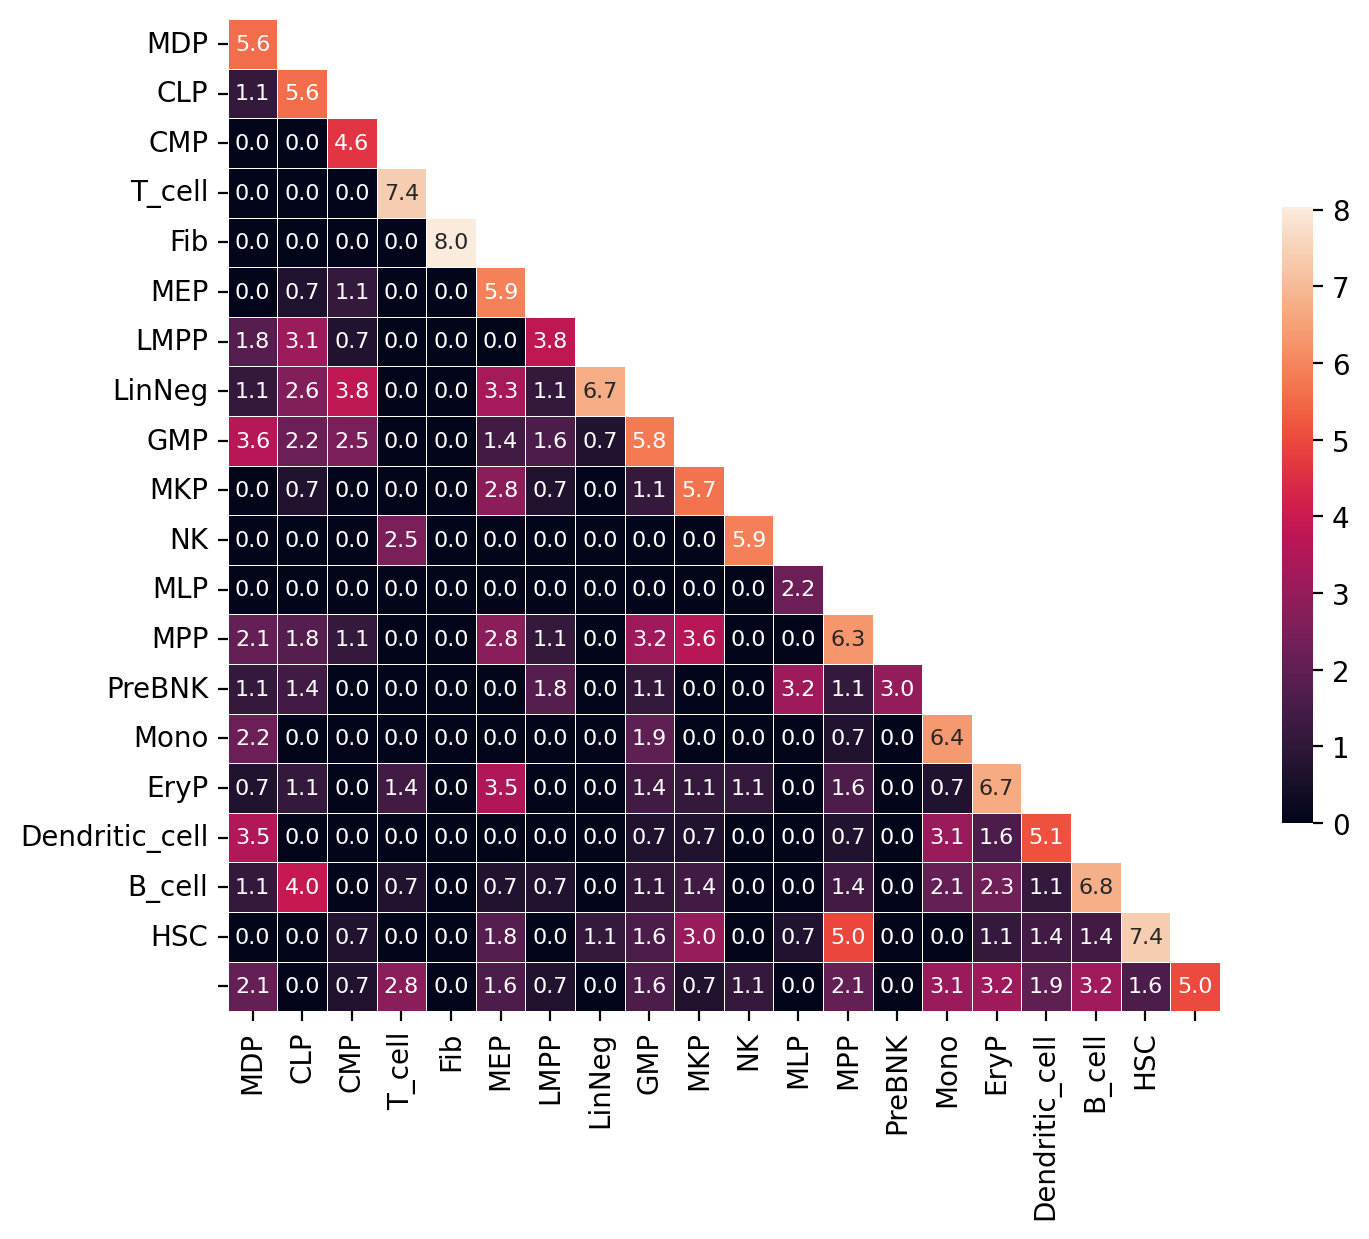

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8, 8

mask = np.triu(np.ones_like(d['conf_matrix'], dtype=bool))
np.fill_diagonal(mask, False)

sns.heatmap(
    np.log1p(d['conf_matrix']),
    square=True,
    cbar_kws={'shrink': 0.5},
    lw=0.25,
    linecolor='w',
    annot=True,
    annot_kws={'fontsize' : 8},
    fmt=".1f",
    mask=mask 
)

plt.ylabel("")
plt.xlabel("")

In [4]:
d['conf_matrix']

,MDP,CLP,CMP,T_cell,Fib,MEP,LMPP,LinNeg,GMP,MKP,NK,MLP,MPP,PreBNK,Mono,EryP,Dendritic_cell,B_cell,HSC,None
MDP,260.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,0.0,0.0,5.0,0.0,16.0,1.0,7.0,1.0,0.0,1.0
CLP,2.0,262.0,1.0,0.0,0.0,2.0,13.0,0.0,4.0,0.0,0.0,0.0,9.0,0.0,1.0,5.0,3.0,26.0,0.0,0.0
CMP,0.0,0.0,101.0,0.0,0.0,9.0,1.0,0.0,23.0,18.0,0.0,1.0,51.0,0.0,0.0,1.0,0.0,2.0,70.0,1.0
T_cell,0.0,0.0,0.0,1630.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,5.0,5.0,0.0,4.0,3.0,0.0
Fib,0.0,0.0,0.0,0.0,3078.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MEP,0.0,1.0,2.0,0.0,0.0,375.0,0.0,0.0,5.0,27.0,0.0,0.0,73.0,0.0,0.0,112.0,0.0,0.0,28.0,2.0
LMPP,5.0,22.0,1.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
LinNeg,2.0,13.0,43.0,0.0,0.0,26.0,2.0,831.0,118.0,6.0,0.0,0.0,29.0,3.0,0.0,65.0,0.0,1.0,94.0,0.0
GMP,36.0,8.0,11.0,0.0,0.0,3.0,4.0,1.0,330.0,4.0,0.0,2.0,49.0,4.0,3.0,1.0,2.0,4.0,6.0,0.0
MKP,0.0,1.0,0.0,0.0,0.0,16.0,1.0,0.0,2.0,284.0,0.0,0.0,41.0,0.0,1.0,3.0,0.0,1.0,19.0,2.0


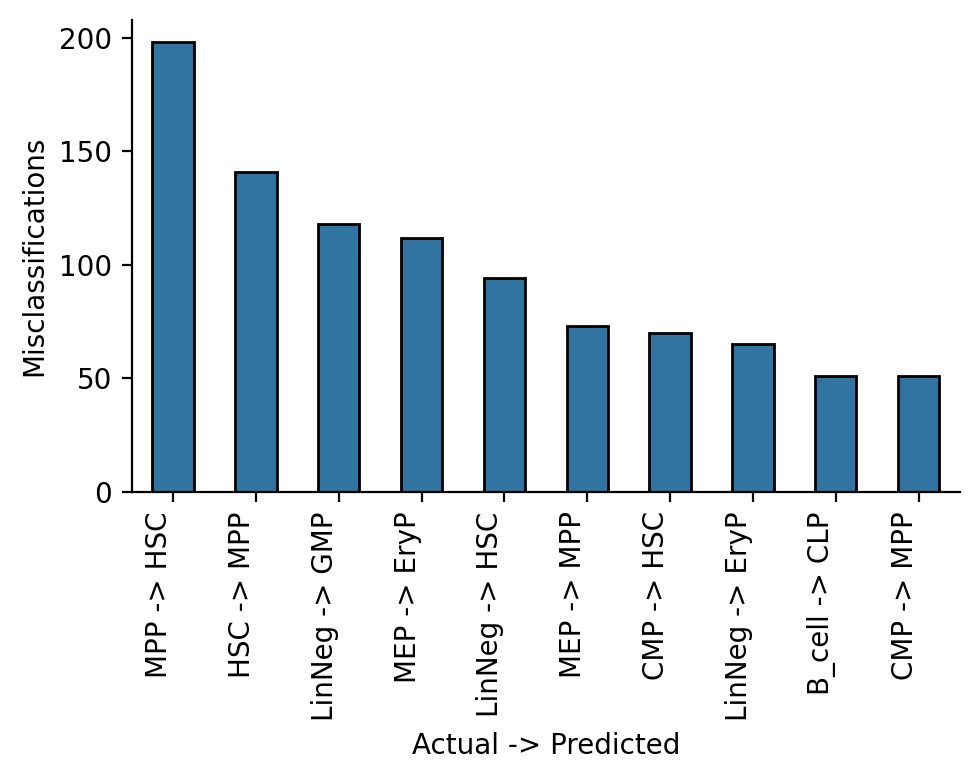

In [5]:
def plot_top_misclassifications(confusion_matrix, top_n=10):
    """
    Plots the top N misclassification errors from a confusion matrix.

    Args:
    confusion_matrix: A pandas DataFrame representing the confusion matrix.
    top_n: The number of top misclassifications to display.
    """

    # Get all misclassification counts (excluding diagonal)
    misclassifications = confusion_matrix.copy()
    np.fill_diagonal(misclassifications.values, 0)

    # Reshape and sort misclassifications
    misclass_series = misclassifications.stack().sort_values(ascending=False)
    top_misclass = misclass_series[:top_n]

    # Prepare labels for the bar plot
    labels = [f'{row} -> {col}' for (row, col) in top_misclass.index]

    # Create the bar plot
    sns.barplot(
        x=labels, 
        y=top_misclass.values,
        ec='k',
        width=0.5,
    )
    plt.xlabel('Actual -> Predicted')
    plt.ylabel('Misclassifications')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    sns.despine()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 4
plot_top_misclassifications(d['conf_matrix'])

In [13]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/finetuned_models/merged_adata/240923_geneformer_cellClassifier_hsc/ksplit1/predictions.pkl"
preds_output = load_pickle_file(fpath)
print(f"{type(preds_output)=}")

fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/finetuned_models/merged_adata/hsc_id_class_dict.pkl"
class_labels = load_pickle_file(fpath)
class_labels

type(preds_output)=<class 'transformers.trainer_utils.PredictionOutput'>


{0: 'MDP',
 1: 'CLP',
 2: 'CMP',
 3: 'T_cell',
 4: 'Fib',
 5: 'MEP',
 6: 'LMPP',
 7: 'LinNeg',
 8: 'GMP',
 9: 'MKP',
 10: 'NK',
 11: 'MLP',
 12: 'MPP',
 13: 'PreBNK',
 14: 'Mono',
 15: 'EryP',
 16: 'Dendritic_cell',
 17: 'B_cell',
 18: 'HSC',
 19: None}

In [25]:
logits = torch.tensor(preds_output.predictions)  
preds = F.softmax(logits, dim=-1)
preds = pd.DataFrame(preds.numpy())
preds.columns = [class_labels[x] for x in preds.columns]
preds['label'] = [class_labels[x] for x in preds_output.label_ids]

preds.head()

,MDP,CLP,CMP,T_cell,Fib,MEP,LMPP,LinNeg,GMP,MKP,...,MLP,MPP,PreBNK,Mono,EryP,Dendritic_cell,B_cell,HSC,None,label
0,0.000898,0.001083,0.020990,0.000086,1.259057e-05,0.001689,4.382892e-04,0.000032,0.071282,0.282983,...,0.000097,0.576668,0.000022,0.000173,0.000394,0.000400,0.000331,0.033079,0.009169,MKP
1,0.000016,0.000007,0.000033,0.000045,3.175258e-05,0.000026,9.395463e-07,0.999633,0.000030,0.000005,...,0.000020,0.000003,0.000045,0.000013,0.000027,0.000028,0.000006,0.000009,0.000002,LinNeg
2,0.000006,0.000666,0.000041,0.000093,2.801271e-07,0.000011,3.543362e-05,0.000016,0.000055,0.000011,...,0.000012,0.000017,0.000020,0.000037,0.000074,0.000044,0.998533,0.000088,0.000212,B_cell
3,0.000008,0.000059,0.000048,0.394927,1.332086e-04,0.000032,1.832598e-04,0.000176,0.000050,0.000070,...,0.000315,0.000017,0.000266,0.002174,0.001244,0.000054,0.000676,0.000104,0.002906,NK
4,0.000366,0.968708,0.000021,0.000090,2.997387e-05,0.000146,2.853337e-03,0.000039,0.000084,0.000062,...,0.000004,0.000191,0.000182,0.000024,0.000984,0.000142,0.025751,0.000030,0.000269,CLP


In [39]:
list(preds.columns)

['MDP',
 'CLP',
 'CMP',
 'T_cell',
 'Fib',
 'MEP',
 'LMPP',
 'LinNeg',
 'GMP',
 'MKP',
 'NK',
 'MLP',
 'MPP',
 'PreBNK',
 'Mono',
 'EryP',
 'Dendritic_cell',
 'B_cell',
 'HSC',
 None,
 'label']

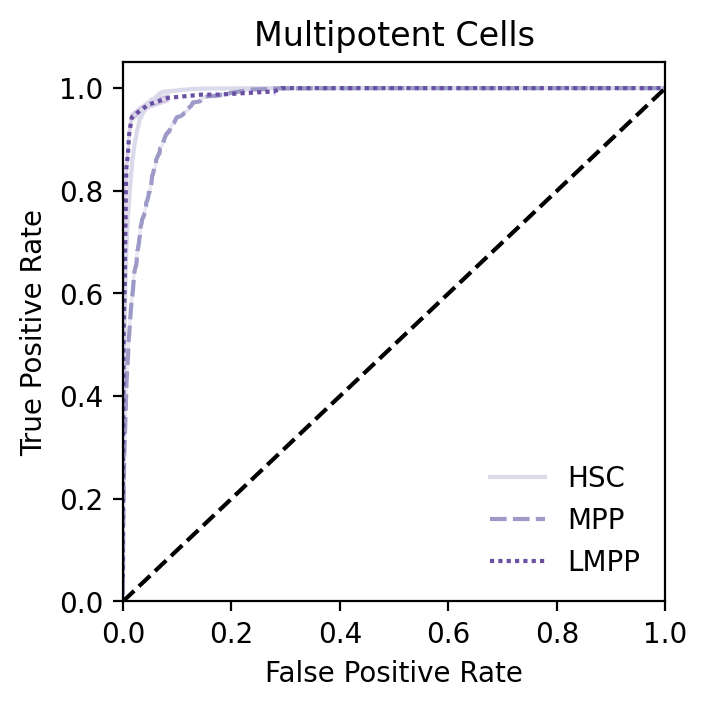

<Figure size 700x700 with 0 Axes>

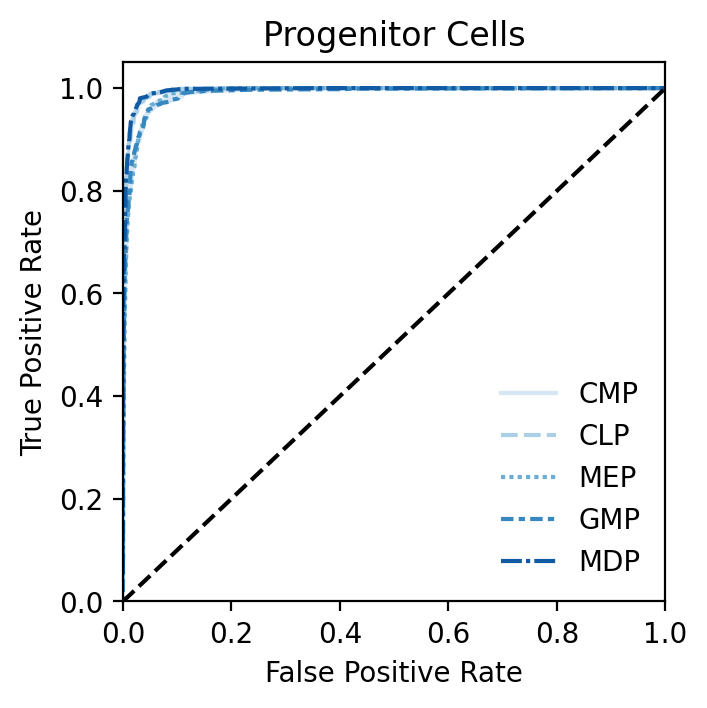

<Figure size 700x700 with 0 Axes>

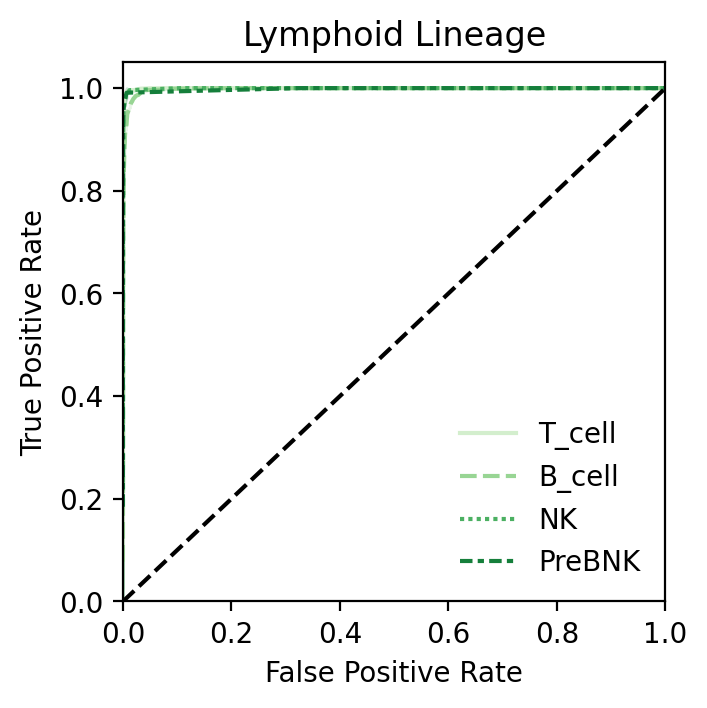

<Figure size 700x700 with 0 Axes>

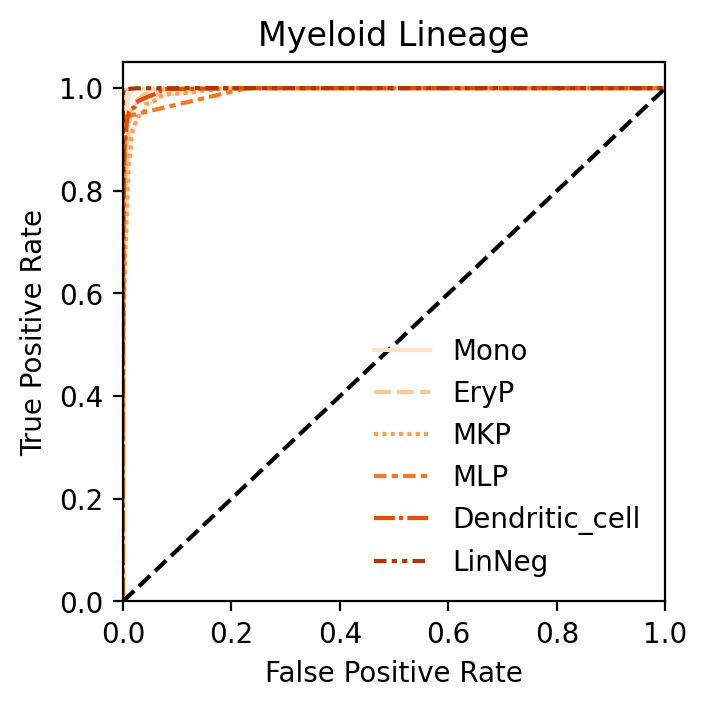

<Figure size 700x700 with 0 Axes>

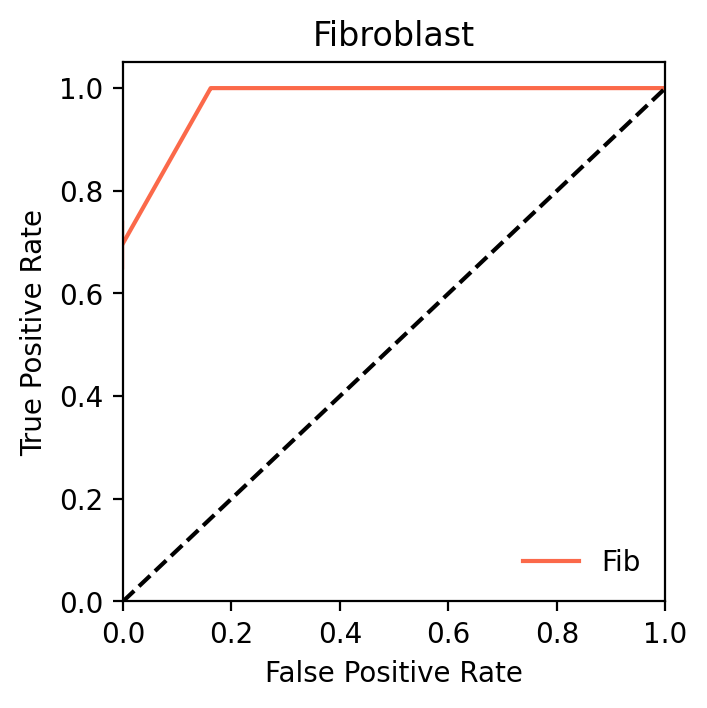

<Figure size 700x700 with 0 Axes>

In [74]:
# Cell types to plot
hematopoietic_cell_types = {
    "Multipotent Cells": ["HSC", "MPP", "LMPP"],
    "Progenitor Cells": ["CMP", "CLP", "MEP", "GMP", "MDP"],
    "Lymphoid Lineage": ["T_cell", "B_cell", "NK", "PreBNK"],
    "Myeloid Lineage": [
        "Mono",
        "EryP",
        "MKP",
        "MLP",
        "Dendritic_cell",
        "LinNeg",
    ],
    'Fibroblast' : [
        "Fib",
    ]
}

colormaps = [
    'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
]

roc_results = []

for i, (subcat, cell_types) in enumerate(hematopoietic_cell_types.items()):
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 3.5, 3.5
    plt.figure()

    result = []
    for cell_type in cell_types:
        mask = (preds['label'] == cell_type)
        fpr, tpr, _ = roc_curve(mask, preds[cell_type])
        
        tmp = pd.DataFrame({
                'fpr' : fpr,
                'tpr' : tpr,
        })
        
        tmp['cell_type'] = cell_type
        
        result.append(tmp)
        roc_auc = auc(fpr, tpr)
        roc_results.append({
            'category' : subcat,
            'cell_type' : cell_type,
            'roc' : roc_auc
        })
      
    
    result = pd.concat(result)
    
    sns.lineplot(
        data=result,
        x='fpr',
        y='tpr',
        hue='cell_type',
        style='cell_type',
        palette=colormaps[i],
    )
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend(
        loc="lower right",
        frameon=False,
    )
    plt.title(subcat)
    plt.show()
    sns.despine()

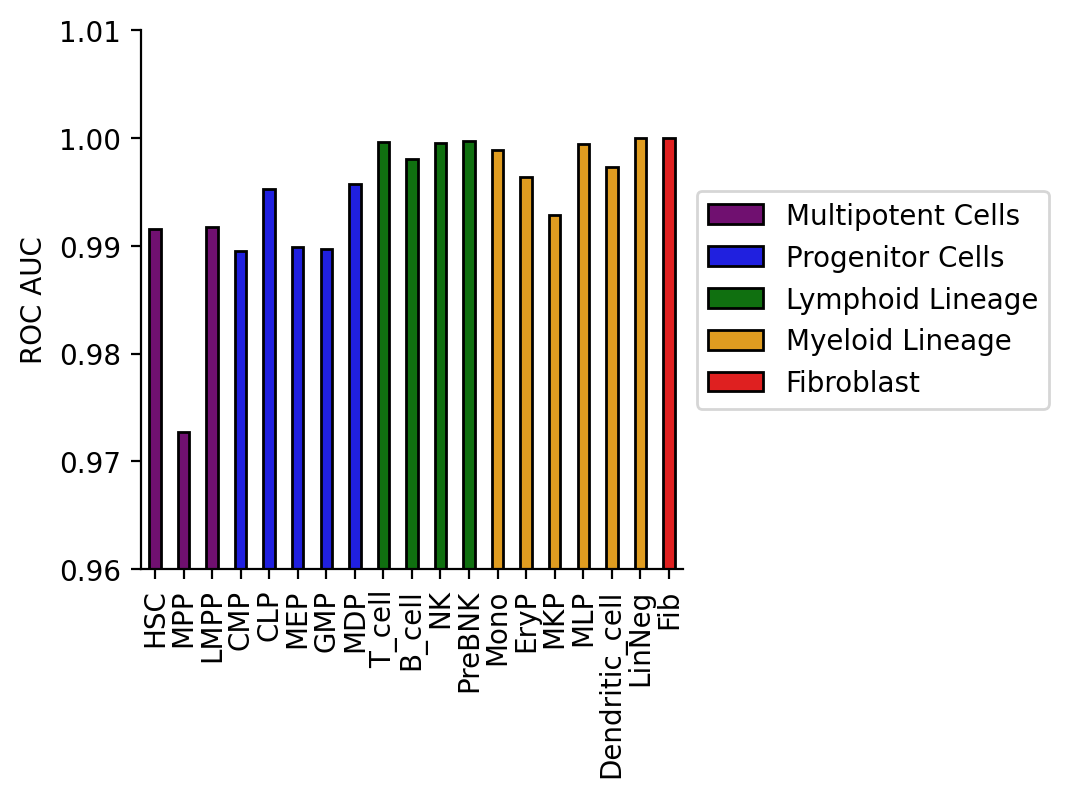

In [99]:
roc_results = pd.DataFrame(roc_results)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3.5, 3.5

sns.barplot(
    data=roc_results,
    x='cell_type',
    y='roc',
    hue='category',
    ec='k',
    width=0.4,
    palette=['purple', 'blue', 'green', 'orange', 'red',]
)

plt.ylim([0.96, 1.01])

sns.move_legend(
    plt.gca(),
    title='',
    loc='center right',
    bbox_to_anchor=(1.7, 0.5),
    # ncols=len(hematopoietic_cell_types.keys()),
)

plt.xlabel('')
plt.ylabel('ROC AUC')
plt.tick_params(axis='x', rotation=90)
sns.despine()

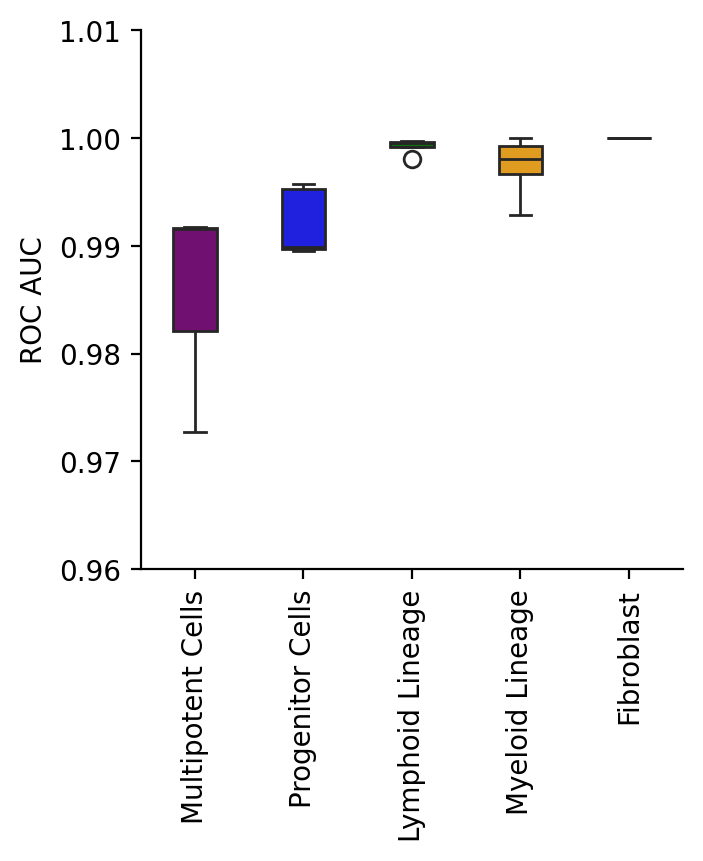

In [102]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3.5, 3.5

sns.boxplot(
    data=roc_results,
    x='category',
    y='roc',
    hue='category',
    # ec='k',/
    
    width=0.4,
    palette=['purple', 'blue', 'green', 'orange', 'red',]
)

plt.ylim([0.96, 1.01])

# sns.move_legend(
#     plt.gca(),
#     title='',
#     loc='center right',
#     bbox_to_anchor=(1.7, 0.5),
#     # ncols=len(hematopoietic_cell_types.keys()),
# )

plt.xlabel('')
plt.ylabel('ROC AUC')
plt.tick_params(axis='x', rotation=90)
sns.despine()

In [72]:
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 8, 8

# sns.barplot(
#     data=preds,
#     y='HSC',
#     x='label',
# )

In [ ]:
break

In [ ]:
def plot_roc_curve(prediction_output, true_labels):
    """
    Plots an ROC curve from a transformers.trainer_utils.PredictionOutput object.

    Args:
      prediction_output: A PredictionOutput object containing model predictions.
      true_labels: The true labels for the dataset.
    """

    # Extract probabilities for the positive class (assuming binary classification)
    if len(prediction_output.predictions.shape) == 1:  # If only one logit is returned
        probabilities = prediction_output.predictions
    else:  # If logits for multiple classes are returned
        probabilities = softmax(prediction_output.predictions, axis=1)[:, 1] 

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
    auc = roc_auc_score(true_labels, probabilities)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier   

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage   
plot_roc_curve(predictions, labels) 

In [ ]:
break

# Trainning Metrics

In [ ]:
dpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/finetuned_models/merged_adata/"

file_list = glob.glob(f"{dpath}*/ksplit1/checkpoint*/trainer_state.json")
file_list


In [ ]:
results = []

for fpath in file_list:
    
    with open(fpath, 'r') as json_file:
        data = json.load(json_file)
        results += data['log_history'] 
    
results = pd.DataFrame(results)
results

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4,3

sns.lineplot(
    data=results,
    x='epoch',
    y='loss',
    label='Train',
    zorder=5,
)

sns.lineplot(
    data=results,
    x='epoch',
    y='eval_loss',
    label='Eval',
    zorder=6,
)

plt.axvspan(
    0, 1, zorder=0, 
    alpha=0.5, 
    color='lightgrey', 
    lw=0,
)

# Add gridlines for both major and minor ticks
plt.grid(True, which='both')

plt.ylabel("Loss")
plt.xlabel("Epoch")

sns.despine()

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3


# Create the line plot with enhanced aesthetics
sns.lineplot(
    data=results,
    x='epoch',
    y='eval_accuracy',
    marker=".",  
    color='b',   
    linewidth=1,
    label='Accuracy',
)

sns.lineplot(
    data=results,
    x='epoch',
    y='eval_macro_f1',
    marker=".",  
    color='r',   
    linewidth=1,
    label='Marco F1',
)

# Add axis labels with units if applicable
plt.xlabel('Epoch')
plt.ylabel('Performance') 

# Add gridlines for both major and minor ticks
plt.grid(True, which='both')

# Adjust the plot margins for better spacing
plt.tight_layout()

# Display the plot
plt.show()

sns.despine()

In [ ]:
# 